In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("Downloads\linear_regression_dataset.csv")
df

,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,A,Alice,371.099650
1,48.617357,64.446117,63,B,Charlie,299.184743
2,56.476885,61.820944,25,C,Bob,319.605931
3,65.230299,62.149045,56,C,Alice,348.440917
4,47.658466,41.569469,33,C,Bob,201.644393
...,...,...,...,...,...,...
200,54.967142,72.642384,62,A,Alice,371.099650
201,48.617357,64.446117,63,B,Charlie,299.184743
202,56.476885,61.820944,25,C,Bob,319.605931
203,65.230299,62.149045,56,C,Alice,348.440917


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  195 non-null    float64
 1   Feature2  197 non-null    float64
 2   Feature3  205 non-null    int64  
 3   Category  205 non-null    object 
 4   Name      205 non-null    object 
 5   Target    205 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.7+ KB


In [12]:
df.shape

(205, 6)

In [13]:
df.isnull().sum()

Feature1    10
Feature2     8
Feature3     0
Category     0
Name         0
Target       0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(5)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
# replace null values
for col in df.columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [18]:
df.isnull().sum()

Feature1    0
Feature2    0
Feature3    0
Category    0
Name        0
Target      0
dtype: int64

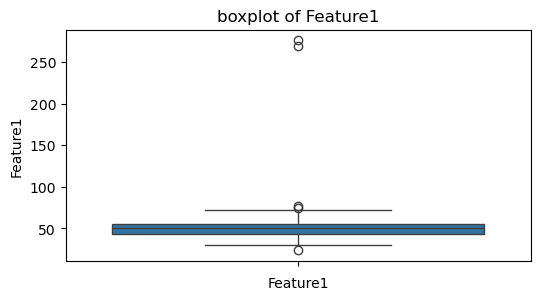

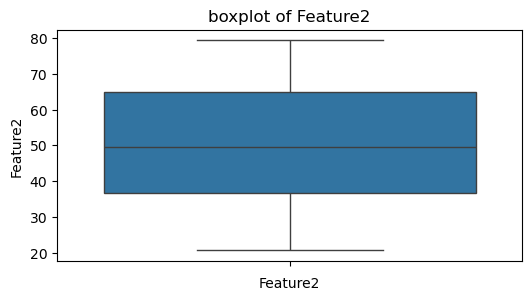

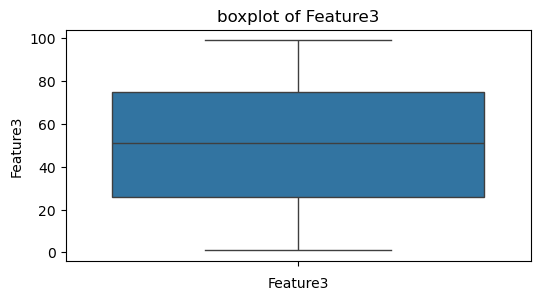

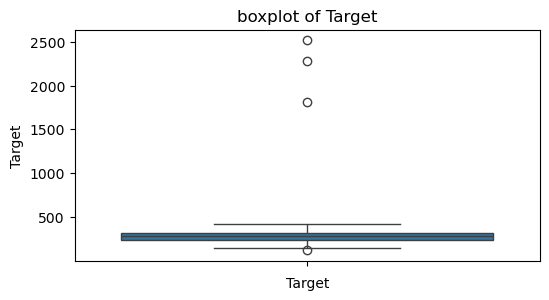

In [19]:
# check for outliers. there are outliers as seen below
# will not remove outliers intentinally to see its effect on the linear regression model
for col in df.columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        plt.figure(figsize=(6,3))
        sns.boxplot(df[col])
        plt.title(f"boxplot of {col}")
        plt.xlabel(col)
        plt.show()

In [20]:
# outliers not removed
df.shape

(200, 6)

In [23]:
# encoding
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for col in df.columns:
  if df[col].dtype == "object":
    df[col] = LE.fit_transform(df[col])

In [24]:
df.head()

,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,0,0,371.099650
1,48.617357,64.446117,63,1,2,299.184743
2,56.476885,61.820944,25,2,1,319.605931
3,65.230299,62.149045,56,2,0,348.440917
4,47.658466,41.569469,33,2,1,201.644393


In [25]:
# model building

In [26]:
# splitting the data x,y
x = df.iloc[:, :-1]
y = df["Target"]

In [27]:
x.head()

,Feature1,Feature2,Feature3,Category,Name
0,54.967142,72.642384,62,0,0
1,48.617357,64.446117,63,1,2
2,56.476885,61.820944,25,2,1
3,65.230299,62.149045,56,2,0
4,47.658466,41.569469,33,2,1


In [28]:
y.head()

0    371.099650
1    299.184743
2    319.605931
3    348.440917
4    201.644393
Name: Target, dtype: float64

In [33]:
#  Splitting in terms of testing and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.80,random_state=0)

In [34]:
x_train.head()

,Feature1,Feature2,Feature3,Category,Name
134,40.805758,65.052264,50,1,1
66,49.279899,41.358361,46,1,0
26,38.490064,21.830015,14,2,1
113,74.632421,21.396316,17,0,2
168,47.546119,57.093084,79,1,0


In [36]:
y_train

134    275.969032
66     270.546622
26     189.192047
113    299.361955
168    312.457503
          ...    
67     353.502065
192    251.147214
117    268.956321
47     257.407931
172    217.404984
Name: Target, Length: 160, dtype: float64

In [38]:
x_test.head()

,Feature1,Feature2,Feature3,Category,Name
18,40.919759,42.534977,36,2,2
170,41.104856,25.046408,51,2,2
107,51.745778,21.093310,23,2,3
98,50.051135,47.495173,55,0,1
177,64.535341,79.198375,17,3,0


In [39]:
y_test.head()

18     2278.054568
170     240.822317
107     227.167370
98      290.022854
177     353.081739
Name: Target, dtype: float64

In [40]:
# model initialization
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [41]:
# train model
model.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)
y_pred

array([245.46787052, 217.10421059, 198.4534004 , 281.2022757 ,
       315.94356807, 268.58896173, 241.49640441, 267.06821624,
       320.61157335, 244.31461905, 305.72342211, 313.56839439,
       335.87228879, 287.49417636, 246.08752723, 320.6184365 ,
       285.16369196, 232.6959838 , 288.14227366, 242.15424457,
       295.96956683, 236.50972108, 265.54010857, 277.52756613,
       326.10389552, 229.08129767, 244.65029985, 234.83507094,
       263.58854648, 298.36618744, 334.2091482 , 256.85308279,
       284.65030157, 262.59744815, 286.01698455, 333.83698939,
       307.40112693, 247.29527245, 204.57058548, 234.1454395 ])

In [43]:
# predictions
results = pd.DataFrame(columns=['Actual_values','Predicted_values'])
results['Actual_values'] = y_test
results['Predicted_values'] = y_pred
results

,Actual_values,Predicted_values
18,2278.054568,245.467871
170,240.822317,217.104211
107,227.167370,198.453400
98,290.022854,281.202276
177,353.081739,315.943568
182,297.388956,268.588962
5,252.330118,241.496404
146,273.622272,267.068216
12,347.135308,320.611573
152,186.400772,244.314619


In [44]:
from sklearn.metrics import *

In [45]:
result = r2_score(y_test, y_pred)
print("R2 score: ", result*100)

R2 score:  -9.731099145480693


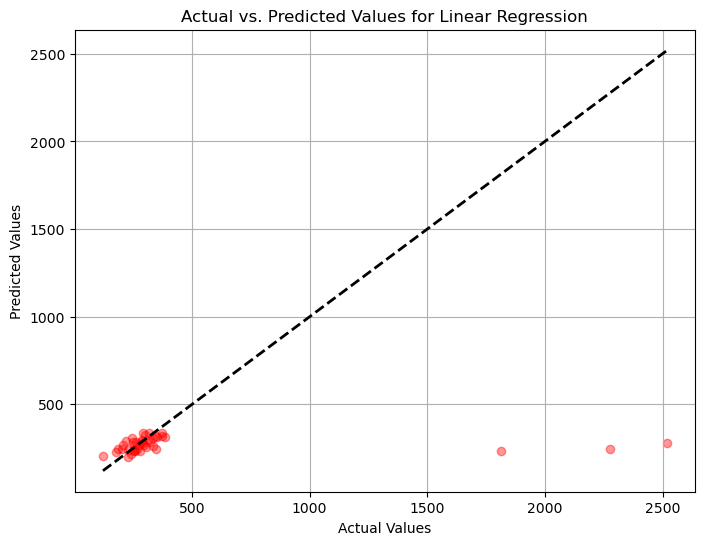

In [46]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.grid(True)
plt.show()